## **Report: Correlation between registrations of electric vehicles and the co2 emissions**

## **Contents:**

1. Introduction
2. Data Source
3. Loading Data
4. Questions about the data
5. Conclusion
7. Further topics and outlook

## **Introduction**

This projects analyzes the correlation between the electric vehicles and the co2 emission in germany. To have a better comparisn, two szenarios are regarded. One the one hand we will have a look at Münster a city in North Rhine-Westphalia and then Germany at total. This will give us a better result in sense to be able to compare to different independet results. Following questions will be answered:
    
* What is the inference from the number of new registered electric vehicles compared to the co2 value in Münster? Is there a correlation between this values?

* What is the inference from the number of new registered electric vehicles compared to the co2 value in Germany? Is there a correlation between this values?

* How do our result match and what is the total inference?

## **Data Source**

This project uses open data from the following data sources:

**1. Datasource: Umweltbundesamt**

* Data URL: https://www.umweltbundesamt.de/sites/default/files/medien/361/dokumente/2021_03_10_trendtabellen_thg_nach_sektoren_v1.0.xlsx
* Data Type: XSLX
* Description: This dataset contains tables to give a estimate of the green house gas estimation for germany since 1990. We focus on the years 2014 until 2020

**2. Datasource: Kraftfahrtbundesamt**

* Data URL: https://www.kba.de/SharedDocs/Downloads/DE/Statistik/Fahrzeuge/FZ14/fz14_2022.xlsx?__blob=publicationFile&v=4
* Data Type: XSLX
* Description: This dataset containes information about the new registered vehicles during the years. We use the information about the new registerd electric cars from 2014 until 2020

**3. Datasource: OpenData.Stadt-Münster**

* Data URL: https://opendata.stadt-muenster.de/sites/default/files/Muenster-CO2-Emissionen_2021.xls
* Data Type: XSLX
* Meta Data: https://opendata.stadt-muenster.de/dcatapde/dataset/entwicklung-der-j%C3%A4hrlichen-co2-emissionen-m%C3%BCnster.xml
* Description: This dataset has information about the co2 emissions of münster from 1990 to 2021. We will focus on the years 2014 to 2020 as mentioned before for the other datasets.

**4. Datasource: OpenData.Stadt-Münster**

* Data URL: https://opendata.stadt-muenster.de/sites/default/files/Fahrzeugbestand-Regierungsbezirk-Muenster-2018-2022.xlsx
* Data Type: XSLX
* Meta Data: https://opendata.stadt-muenster.de/dcatapde/dataset/fahrzeugbestand-regierungsbezirk-m%C3%BCnster-2018-2022.xml

* Description: This Dataset shows the vehicle registrations of the city Münster. We will focus on the electric ones again from 2014 to 2020.



## Installing the needed dependencies

These are all dependencies used in this whole project.

In [302]:
%pip install pandas
%pip install SQLAlchemy
%pip install pytest
%pip install matplotlib
%pip install numpy
%pip install openpyxl
%pip install xlrd


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgr

## **Loading the Data**

Creating pandas dataframes out of stored csv files.

In [303]:
import pandas as pd
import csv 
import numpy

# Read the data from csv to dataframe
df = pd.read_csv('../data/climate_data_germany.csv', header = None, delimiter="\t", quoting=csv.QUOTE_NONE, encoding='utf-8')
df = df.drop(columns=0)

df2 = pd.read_csv('../data/vehicle_registrations_germany.csv', header = None, delimiter="\t", quoting=csv.QUOTE_NONE, encoding='utf-8')

df3 = pd.read_csv('../data/climate_data_muenster.csv', header = None, delimiter="\t", quoting=csv.QUOTE_NONE, encoding='utf-8')

df4 = pd.read_csv('../data/vehicle_registrations_muenster.csv', header = None, delimiter="\t", quoting=csv.QUOTE_NONE, encoding='utf-8')

## **Question about the data**

This chapter answers questions about the data. We will have a certain look to the data and get an inference out of it.

### **1. What is the inference from the number of new registered electric vehicles compared to the co2 value in Münster? Is there a correlation between this values?**

For answering the this question, we have two plots. The first one shows the co2 value of muenster for different sectors. The second one shows the amount of new registered vehicles in muenster.

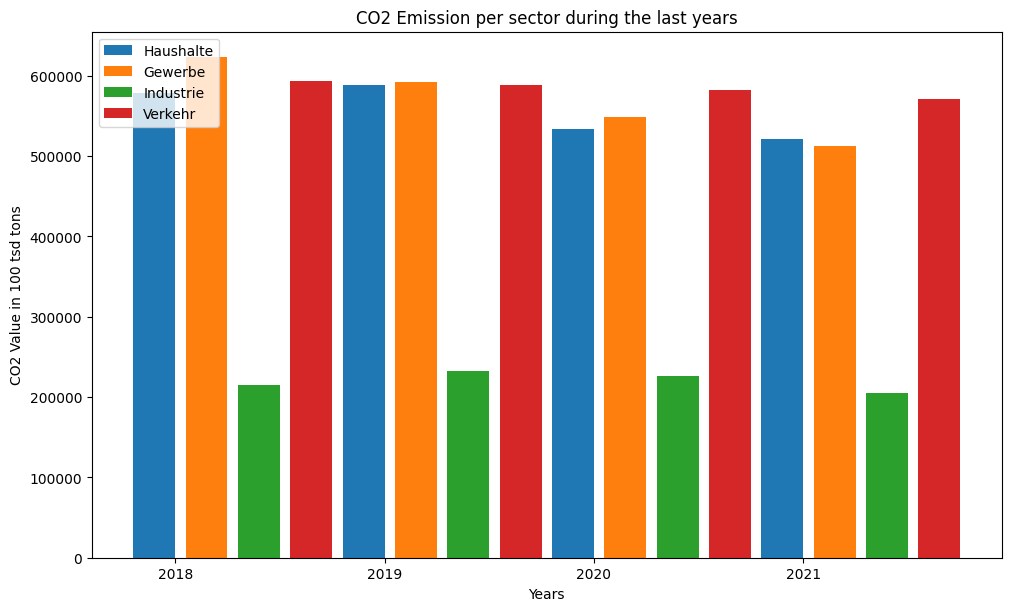

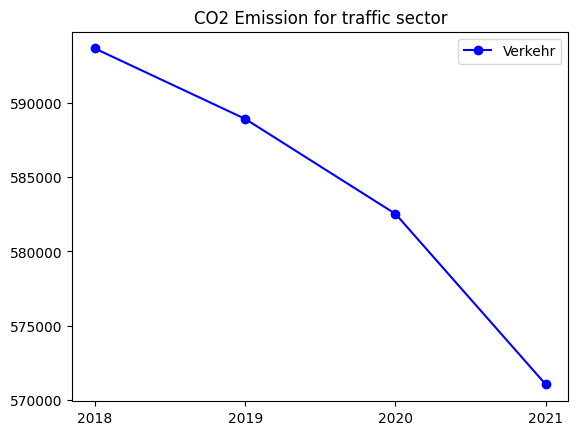

In [304]:
import matplotlib.pyplot as plt

years = df3[1].tolist()
years = years[4:]

sector_names = [df3.loc[0, i] for i in range(2, 6)]

sectors_co2_muenster = {}

for index, sector in enumerate(sector_names):
    
    values_for_sector = [float(df3.loc[i + 2, (index+2)]) for i in range(1, 5)]
    sectors_co2_muenster[sector] = values_for_sector



x = np.arange(len(years))
width = 0.2  
margin = 0.05  

fig, ax = plt.subplots(figsize=(10, 6), constrained_layout=True)

for i, (sector_name, values) in enumerate(sectors_co2_muenster.items()):
    offset = (width + margin) * (i % len(sector_names)) 
    rects = ax.bar(x + offset, values, width, label=sector_name)
    

ax.set_ylabel('CO2 Value in 100 tsd tons')
ax.set_xlabel('Years')
ax.set_title('CO2 Emission per sector during the last years')
ax.set_xticks(x + width/2, years)
ax.legend(loc='upper left', ncols=1)


plt.show()

sector_traffic = sectors_co2_muenster['Verkehr']

plt.plot(years, sector_traffic, label='Verkehr', marker='o', color='blue')
plt.title('CO2 Emission for traffic sector')
plt.legend(loc='upper right')
plt.xticks(years)
plt.show()

[64.60829493087557, 95.74468085106383, 164.41647597254004, 117.2436174816097]


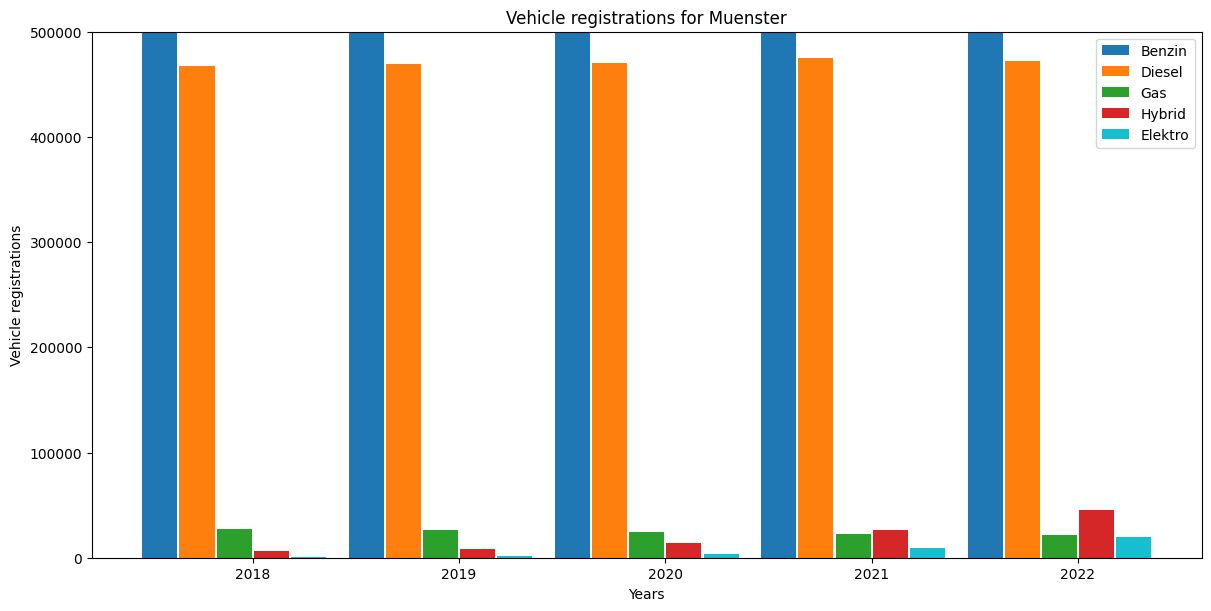

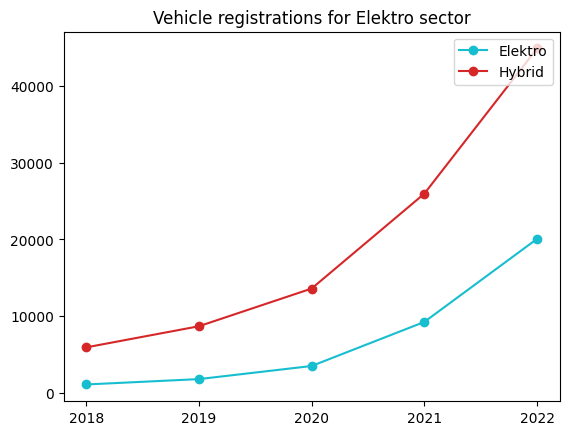

In [305]:
import matplotlib.pyplot as plt

years = df4[1].tolist()
years = years[1:]
years = [int(float(x)) for x in years]
years = np.flip(years)

sector_names = [df4.loc[0, i] for i in range(4, 9)]

sectors_vehicles_muenster = {}
sectors_vehicles_muenster_reduced = {}
growth_rates_vehicles_muenster = {}

for index, sector in enumerate(sector_names):
    values_for_sector = [float(df4.loc[i + 1, (index + 4)]) for i in range(len(sector_names))]
    values_for_sector = np.flip(values_for_sector)
    sectors_vehicles_muenster[sector] = values_for_sector
    sectors_vehicles_muenster_reduced[sector] = values_for_sector[:-1]
    growth_rate = [(values_for_sector[i+1] - values_for_sector[i]) / values_for_sector[i] * 100 for i in range(len(values_for_sector[:-1]))]
    growth_rates_vehicles_muenster[sector] = growth_rate

print(growth_rate)

x = np.arange(len(years))
width = 0.17  
margin = 0.01  
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#17becf']
fig, ax = plt.subplots(figsize=(12, 6), constrained_layout=True)

for i, (sector_name, values) in enumerate(sectors_vehicles_muenster.items()):
    offset = (width + margin) * i  
    rects = ax.bar(x + offset, values, width, label=sector_name, color=custom_colors[i])
    

ax.set_ylabel('Vehicle registrations')
ax.set_xlabel('Years')
ax.set_title('Vehicle registrations for Muenster')
ax.set_xticks(x + (width+margin)*(len(sector_names) / 2), years)
ax.set_ylim(0, 500000)
ax.legend(loc='upper right', ncols=1)

plt.show()

elektro_values = sectors_vehicles_muenster['Elektro']
hybrid_values = sectors_vehicles_muenster['Hybrid']

plt.plot(years, elektro_values, label='Elektro', marker='o', color='#17becf')
plt.plot(years, hybrid_values, label='Hybrid', marker='o', color='#d62728')
plt.title('Vehicle registrations for Elektro sector')
plt.legend(loc='upper right')
plt.xticks(years)
plt.show()

### **Inference for Question 1**

Following inferences can be made:

* The number of electric vehicles in muenster is increasing the last years
* The amount of the co2 emission in muenster is decreasing the last years
* So we can assume a correlation between increasing electric vehicle registrations and decreasing co2 value. But there is also a significant decrease of hybrid vehicles. They have also some co2 output.


### **2. What is the inference from the number of new registered electric vehicles compared to the co2 value in Germany? Is there a correlation between this values?**

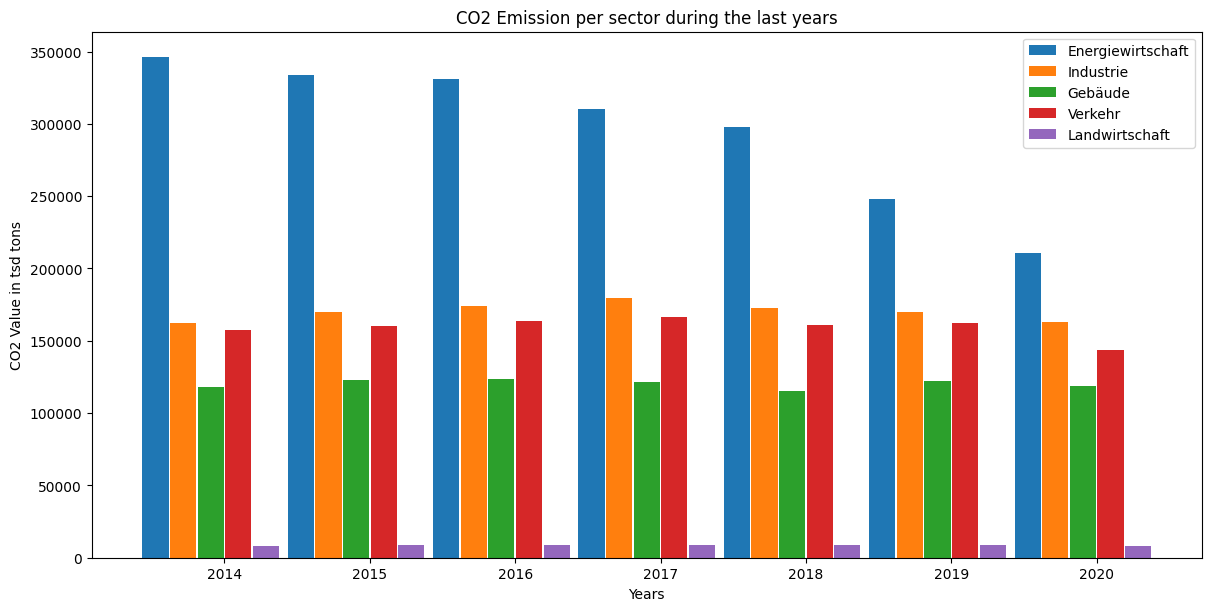

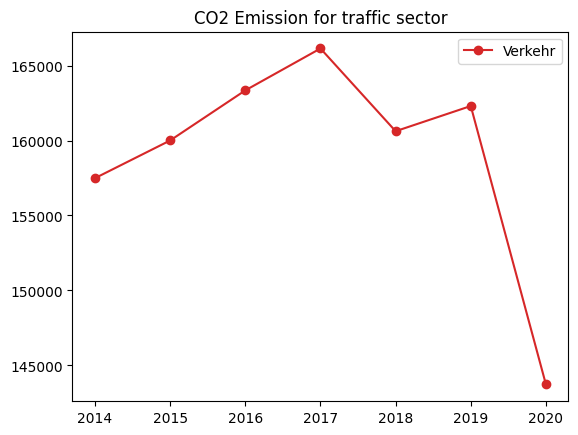

In [306]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np

years = [int(df.loc[0,i]) for i in range(3,10)]

sector_names = ['Energiewirtschaft', 'Industrie', 'Gebäude', 'Verkehr', 'Landwirtschaft']
sectors_co2_germany = {}

for index, sector in enumerate(sector_names):

    values_for_sector = [df.loc[(index+1), i] for i in range(3, 10)]
    
    sectors_co2_germany[sector] = values_for_sector

x = np.arange(len(years))    
width = 0.18
margin = 0.01

fig, ax = plt.subplots(figsize=(12, 6), constrained_layout=True)

for i, (sector_name, values) in enumerate(sectors_co2_germany.items()):
    offset = (width + margin) * (i % 5) 
    rects = ax.bar(x + i // 5 * 1 + offset, values, width, label=sector_name)
    

ax.set_ylabel('CO2 Value in tsd tons')
ax.set_xlabel('Years')
ax.set_title('CO2 Emission per sector during the last years')
ax.set_xticks(x + (width+margin)*(len(sector_names) / 2), years)
ax.legend(loc='upper right', ncols=1)


plt.show()

sector_traffic = sectors_co2_germany['Verkehr']

plt.plot(years, sector_traffic, label='Verkehr', marker='o', color='#d62728')
plt.title('CO2 Emission for traffic sector')
plt.legend(loc='upper right')
plt.xticks(years)
plt.show()

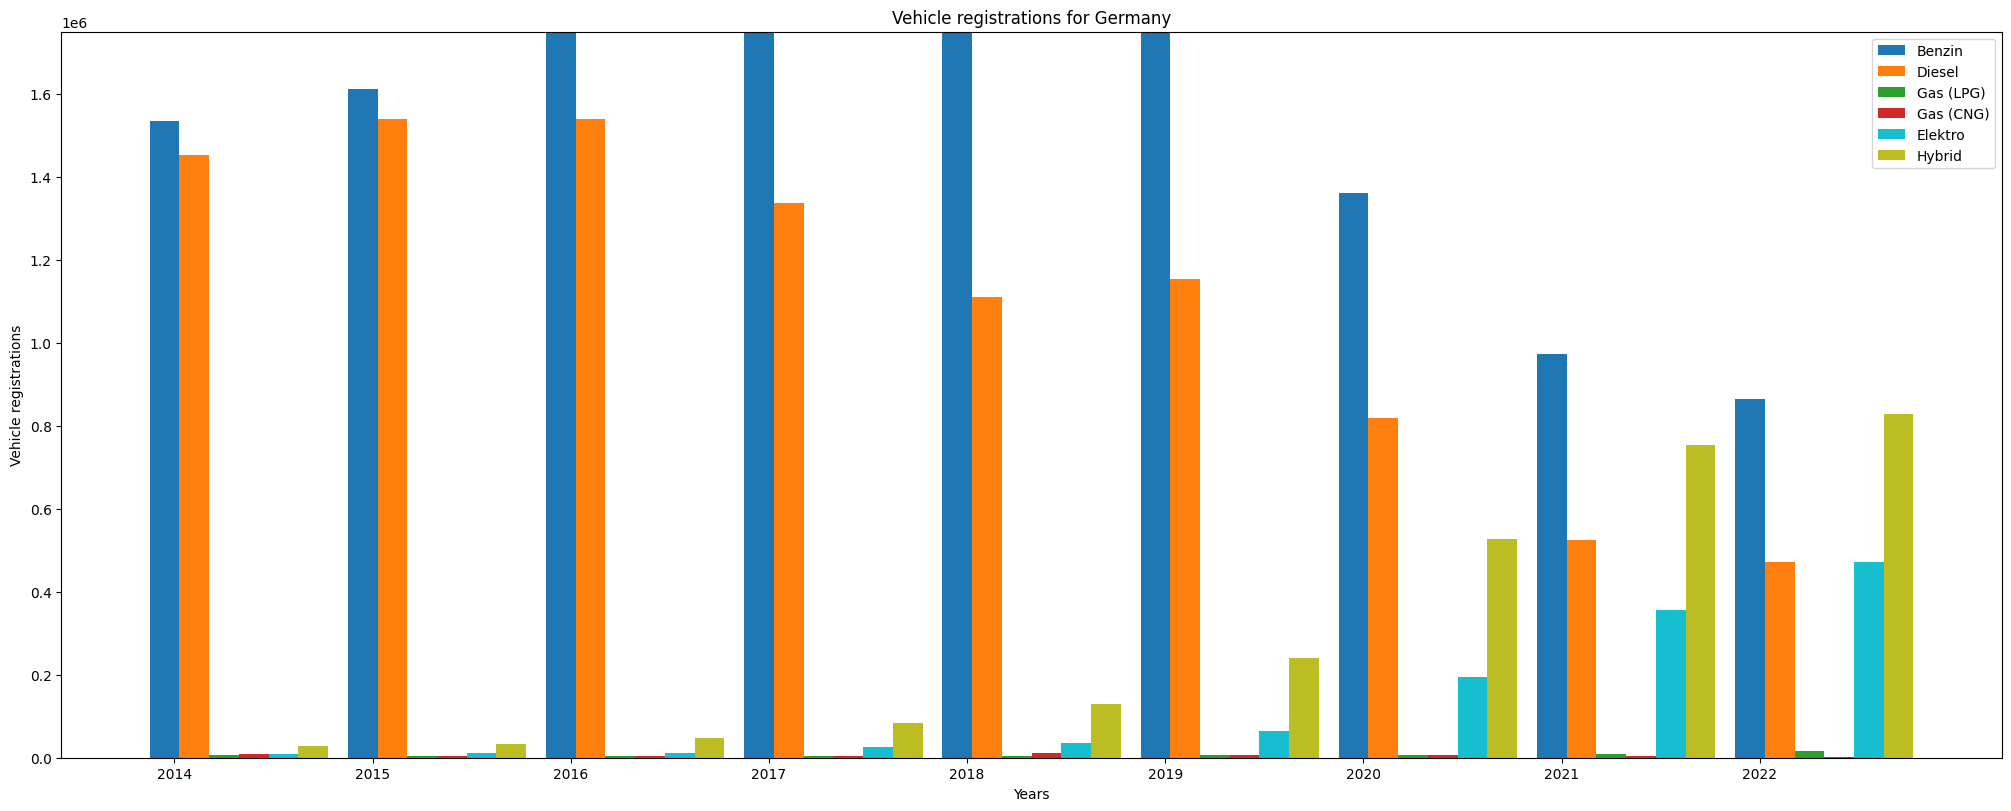

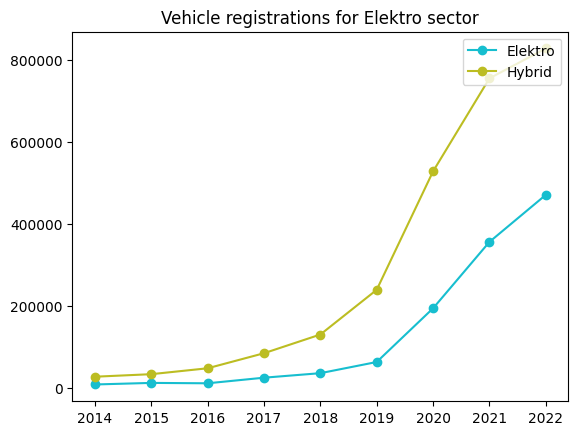

In [307]:
import matplotlib.pyplot as plt

years = df2[1].tolist()
years = years[1:]
years = [int(float(x)) for x in years]

sector_names = [df2.loc[0, i] for i in range(2, 8)]

sectors_vehicles_germany = {}
sectors_vehicles_germany_reduced = {}

for index, sector in enumerate(sector_names):
    values_for_sector = [float(df2.loc[i + 1, (index + 2)]) for i in range(len(years))]
    sectors_vehicles_germany[sector] = values_for_sector
    sectors_vehicles_germany_reduced[sector] = values_for_sector[:-2]



x = np.arange(len(years))
width = 0.15  
margin = 0.0  
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#17becf', '#bcbd22']
fig, ax = plt.subplots(figsize=(20, 8), constrained_layout=True)

for i, (sector_name, values) in enumerate(sectors_vehicles_germany.items()):
    offset = (width + margin) * (i - len(sector_names))
    rects = ax.bar(x + offset, values, width, label=sector_name, color=custom_colors[i])
    

ax.set_ylabel('Vehicle registrations')
ax.set_xlabel('Years')
ax.set_title('Vehicle registrations for Germany')
ax.set_xticks(x - (width+0.7), years)
ax.set_ylim(0, 1750000)
ax.legend(loc='upper right', ncols=1)

plt.show()

elektro_values = sectors_vehicles_germany['Elektro']
hybrid_values = sectors_vehicles_germany['Hybrid']

plt.plot(years, elektro_values, label='Elektro', marker='o', color='#17becf')
plt.plot(years, hybrid_values, label='Hybrid', marker='o', color='#bcbd22')

plt.title('Vehicle registrations for Elektro sector')
plt.legend(loc='upper right')
plt.xticks(years)
plt.show()

### **Inference for Question 2**

Following inferences can be made:

* The number of electric vehicles in germany is increasing the last years
* The amount of the co2 emission in germany is decreasing the last years
* We can see the huge jump in year 2019 - 2020. The line chart of new registrations for electric vehicles shows the exponential increase of new registered electric vehicles.
* We got also a huge increase of hybrid cars, so we can assume these two sectors of vehicles can cause an effect when it comes to reducing our co2 emission in the traffic sector.

### **3. How do our result match and what is the total inference?**


In [308]:
from scipy.stats import pearsonr

cols1 = ['Verkehr']
cols2 = ['Benzin', 'Diesel', 'Gas (LPG)', 'Gas (CNG)', 'Elektro', 'Hybrid']

correlations = []
for c1 in cols1:
    for c2 in cols2:
        corr, pvalue = pearsonr(sectors_co2_germany[c1], sectors_vehicles_germany_reduced[c2])
        correlations.append({
            'x': c1,
            'y': c2,
            'Correlation Coefficient': corr,
            'p-Value': pvalue
        })

df_corr = pd.DataFrame(correlations, columns=correlations[0].keys())
df_corr.set_index(['x', 'y'], inplace=True)
df_corr.sort_values('Correlation Coefficient', ascending=False)

Correlation Coefficient   p-Value
x       y                                           
Verkehr Benzin                    0.719263  0.068479
        Diesel                    0.675760  0.095652
        Gas (CNG)                -0.317644  0.487538
        Gas (LPG)                -0.493759  0.260094
        Hybrid                   -0.806244  0.028507
        Elektro                  -0.860783  0.012868

We can see that the electric and hybrid vehicles have the strongest negative correlation compared to the co2 value, which means with rising registrations of this both vehicle types, the co2 value is decreasing.

In [309]:
from IPython.display import display

cols1 = ['Verkehr']
cols2 = ['Benzin', 'Diesel', 'Gas', 'Elektro', 'Hybrid']

correlations = []
correlations_w_r_growth = []
for c1 in cols1:
    for c2 in cols2:
        corr, pvalue = pearsonr(sectors_co2_muenster[c1], sectors_vehicles_muenster_reduced[c2])
        correlations.append({
            'x': c1,
            'y': c2,
            'Correlation Coefficient': corr,
            'p-Value': pvalue
        })
        corr2, pvalue2 = pearsonr(sectors_co2_muenster[c1], growth_rates_vehicles_muenster[c2])
        correlations_w_r_growth.append({
            'x': c1,
            'y': c2,
            'Correlation Coefficient': corr2,
            'p-Value': pvalue2
        })

df_corr = pd.DataFrame(correlations, columns=correlations[0].keys())
df_corr.set_index(['x', 'y'], inplace=True)
df_corr.sort_values('Correlation Coefficient', ascending=False)
print("Correlation Table for CO2 Value to new registered vehicles in Muenster")
display(df_corr)

print("\n")

df_corr2 = pd.DataFrame(correlations_w_r_growth, columns=correlations_w_r_growth[0].keys())
df_corr2.set_index(['x', 'y'], inplace=True)
df_corr2.sort_values('Correlation Coefficient', ascending=False)
print("Correlation Table for CO2 Value to growth rate of\n different vehicle types registered in Muenster")
display(df_corr2)

Correlation Table for CO2 Value to new registered vehicles in Muenster


Correlation Coefficient   p-Value
x       y                                         
Verkehr Benzin                 -0.866736  0.133264
        Diesel                 -0.991226  0.008774
        Gas                     0.987555  0.012445
        Elektro                -0.977041  0.022959
        Hybrid                 -0.992449  0.007551



Correlation Table for CO2 Value to growth rate of
 different vehicle types registered in Muenster


Correlation Coefficient   p-Value
x       y                                         
Verkehr Benzin                  0.988208  0.011792
        Diesel                  0.597938  0.402062
        Gas                     0.379205  0.620795
        Elektro                -0.554348  0.445652
        Hybrid                 -0.630500  0.369500

Here we can see in the first correlation table all types of vehicles except gas ones have a strong negative correlation, which gives us no clear result. In the second table we correlate the growth rate, because the numbers of new registered vehicles are increasing in this time period in muenster. Petrol and diesel vehicles are just increasing slowly, but stay almost the same over this period.

### **Inference for question 3**

So first of all we can see an increase of new registered electric vehicles in muenster and in whole germany. The significant years are from 2018 until now. There we can see a huge increase of new registered electric vehicles compared to the other years. The line graphs for the co2 emission value shows us an rapidly decreasing course since 2019 in germany. The slowly increase between 2018 and 2019 could be, because of the short increase of diesel vehicles in this period. Compared to muenster we can see the same course. 

## **Conclusion**

Having a look at inference of question 3 can give us the assumption that the rising of electric vehicles has an impact on the co2 emission value. For the last years we could see the negative correlation of both lines for muenster and also for germany. We have to be careful to make a clear inference out of this result, because the co2 emission of the production of electric batteries for the vehicles is not calculated in here. But having a look just at the traffic sector, we can see the impact of electric and also hybrid vehicles. Hybrid vehicles often use the electric engine in cities or for short distances. These two kinds of vehicles have an positive impact of our co2 emission regarding this view on the traffic sector. 
Another fact is shown in the co2 emission bar chart for germany: there a other sectors (energy, industry) with more co2 emission cause. So despite our results before, maybe it is better to look also for innovative ways to decrease the emission there.

The main question was: Do electric vehicles have a significant impact on the co2 emission value in germany?

This question could be answered with: depends on the view. Electric vehicles have an positive impact on the co2 emission in the traffic sector for germany, but i would not go with saying it is significant for the whole co2 value. This project doesn't involve the co2 emission for producing the batteries and moreover there are other sectors, as mentioned before which have more impact on the co2 value. If we just look at traffic sector, we can see a strong correlation between rising electric vehicles and decreasing co2 value.

## **Further topics and outlook**

Although our conclusion before, there are some topics open:

* Do electric or hybrid vehicles have a better impact on the co2 emission, also regarding the production of the batteries?
* How is the worldwide impact of electric vehicles?
